In [1]:
import pandas as pd

In [2]:
i_94 = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [3]:
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
i_94.date_time = pd.to_datetime(i_94.date_time)

In [6]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [7]:
i_94["dayofweek"] = i_94.date_time.dt.dayofweek

In [8]:
i_94

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,dayofweek
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1
...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,6
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,6
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,6
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,6


In [9]:
i_94['dayofweek'].unique()

array([1, 2, 3, 4, 5, 6, 0], dtype=int64)

In [11]:
 i_94.date_time.dt.strftime("%A")

0        Tuesday
1        Tuesday
2        Tuesday
3        Tuesday
4        Tuesday
          ...   
48199     Sunday
48200     Sunday
48201     Sunday
48202     Sunday
48203     Sunday
Name: date_time, Length: 48204, dtype: object

In [18]:
i_94[i_94["dayofweek"]=="Monday"]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,dayofweek


In [20]:
avrageDayofWeek = i_94.groupby("dayofweek")["traffic_volume"].mean()
avrageDayofWeek

dayofweek
0    3309.387161
1    3488.555799
2    3583.196681
3    3637.899663
4    3656.358836
5    2773.638120
6    2368.588329
Name: traffic_volume, dtype: float64

<Axes: xlabel='dayofweek'>

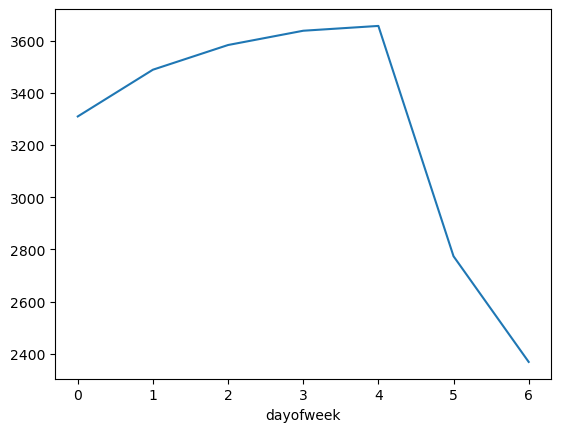

In [21]:
avrageDayofWeek.plot.line()

<Axes: xlabel='dayofweek'>

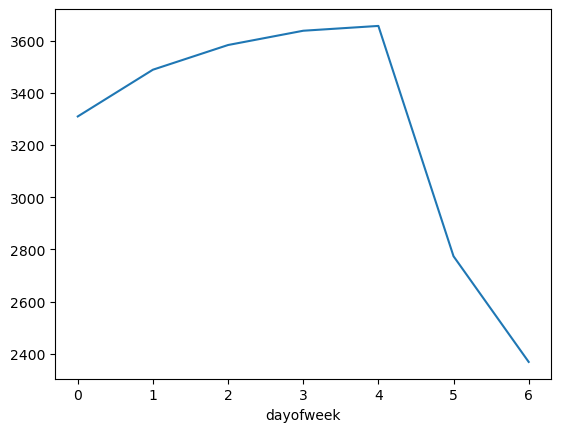

In [22]:
avrageDayofWeek.plot(kind="line")

In [23]:
i_94["hours"] = i_94.date_time.dt.hour 

In [51]:
day_bol = (i_94.date_time.dt.hour >= 7) & (i_94.date_time.dt.hour <19)
day = i_94[day_bol]
day

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,dayofweek,hours
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,9
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,10
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,11
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,12
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,13
...,...,...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302,6,15
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,6,15
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,6,16
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,6,17


In [52]:
day["dayofweek"] = day.date_time.dt.dayofweek
day

C:\Users\hp\AppData\Local\Temp\ipykernel_27588\1226481851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day["dayofweek"] = day.date_time.dt.dayofweek


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,dayofweek,hours
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,9
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,10
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,11
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,12
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,13
...,...,...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302,6,15
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,6,15
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,6,16
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,6,17


In [53]:
day['dayofweek'].unique()

array([1, 2, 3, 4, 5, 6, 0], dtype=int64)

In [54]:
day["dayinwords"] = day.date_time.dt.strftime("%A")
day

C:\Users\hp\AppData\Local\Temp\ipykernel_27588\3442735756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day["dayinwords"] = day.date_time.dt.strftime("%A")


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,dayofweek,hours,dayinwords
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,9,Tuesday
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,10,Tuesday
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,11,Tuesday
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,12,Tuesday
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,13,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302,6,15,Sunday
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,6,15,Sunday
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,6,16,Sunday
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,6,17,Sunday


In [55]:
day[day["dayinwords"]=="Monday"]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,dayofweek,hours,dayinwords
133,None,270.01,0.0,0.0,20,Clouds,few clouds,2012-10-08 07:00:00,6676,0,7,Monday
134,None,271.23,0.0,0.0,20,Clouds,few clouds,2012-10-08 08:00:00,5966,0,8,Monday
135,None,273.71,0.0,0.0,20,Clouds,few clouds,2012-10-08 09:00:00,4832,0,9,Monday
136,None,276.77,0.0,0.0,20,Clouds,few clouds,2012-10-08 10:00:00,4395,0,10,Monday
137,None,279.47,0.0,0.0,20,Clouds,few clouds,2012-10-08 11:00:00,4411,0,11,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
48035,None,296.00,0.0,0.0,40,Clouds,scattered clouds,2018-09-24 14:00:00,4816,0,14,Monday
48036,None,296.52,0.0,0.0,75,Clouds,broken clouds,2018-09-24 15:00:00,5443,0,15,Monday
48037,None,297.04,0.0,0.0,1,Clear,sky is clear,2018-09-24 16:00:00,6307,0,16,Monday
48038,None,296.79,0.0,0.0,1,Clear,sky is clear,2018-09-24 17:00:00,5562,0,17,Monday


In [56]:
import datetime as dt
dir(dt)

['MAXYEAR',
 'MINYEAR',
 'UTC',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'date',
 'datetime',
 'datetime_CAPI',
 'sys',
 'time',
 'timedelta',
 'timezone',
 'tzinfo']

In [57]:
avrageDayofWeek = day.groupby("dayofweek")["traffic_volume"].mean()
avrageDayofWeek

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

<Axes: xlabel='dayofweek'>

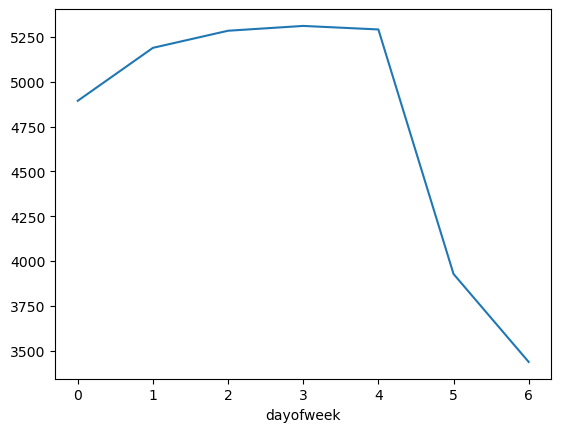

In [58]:
avrageDayofWeek.plot.line()

<Axes: xlabel='dayofweek'>

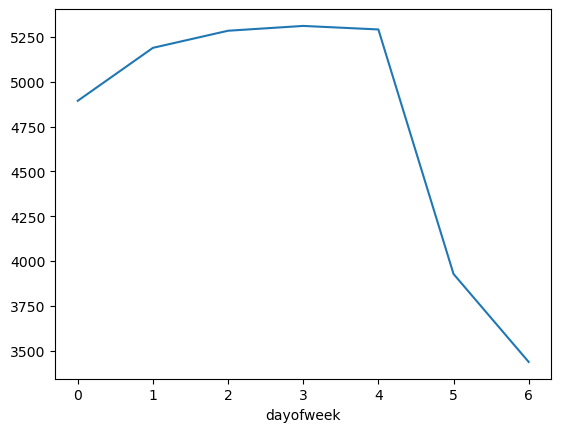

In [59]:
avrageDayofWeek.plot(kind="line")

In [60]:
day["hours"] = day.date_time.dt.hour 
day

C:\Users\hp\AppData\Local\Temp\ipykernel_27588\52027202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day["hours"] = day.date_time.dt.hour


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,dayofweek,hours,dayinwords
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,9,Tuesday
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,10,Tuesday
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,11,Tuesday
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,12,Tuesday
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,13,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302,6,15,Sunday
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,6,15,Sunday
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,6,16,Sunday
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,6,17,Sunday


In [61]:
weekdays = day[day["dayofweek"] <= 4]
weekdays

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,dayofweek,hours,dayinwords
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,9,Tuesday
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,10,Tuesday
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,11,Tuesday
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,12,Tuesday
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,13,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
48143,None,285.00,0.0,0.0,40,Clouds,scattered clouds,2018-09-28 14:00:00,5193,4,14,Friday
48144,None,285.14,0.0,0.0,40,Clouds,scattered clouds,2018-09-28 15:00:00,5838,4,15,Friday
48145,None,285.33,0.0,0.0,40,Clouds,scattered clouds,2018-09-28 16:00:00,6188,4,16,Friday
48146,None,285.24,0.0,0.0,75,Clouds,broken clouds,2018-09-28 17:00:00,5695,4,17,Friday


In [62]:
weekend = day[~(day["dayofweek"]<=4)]
weekend

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,dayofweek,hours,dayinwords
87,None,275.17,0.00,0.0,1,Clear,sky is clear,2012-10-06 07:00:00,2072,5,7,Saturday
88,None,274.99,0.00,0.0,1,Clear,sky is clear,2012-10-06 08:00:00,3342,5,8,Saturday
89,None,275.09,0.00,0.0,40,Clouds,scattered clouds,2012-10-06 09:00:00,4258,5,9,Saturday
90,None,276.88,0.00,0.0,20,Clouds,few clouds,2012-10-06 10:00:00,4861,5,10,Saturday
91,None,278.04,0.00,0.0,20,Clouds,few clouds,2012-10-06 11:00:00,5191,5,11,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302,6,15,Sunday
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,6,15,Sunday
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,6,16,Sunday
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,6,17,Sunday


In [63]:
weekdays.pivot_table(index="hours",values="traffic_volume",)

,traffic_volume
hours,
7,6030.413559
8,5503.497970
9,4895.269257
10,4378.419118
11,4633.419470
12,4855.382143
13,4859.180473
14,5152.995778
15,5592.897768


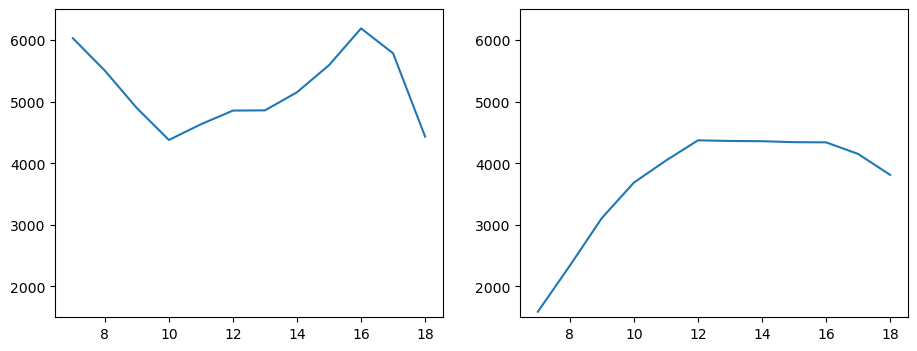

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
Hourly_weekday_avg = weekdays.pivot_table(index="hours",values = "traffic_volume")
plt.plot(Hourly_weekday_avg.index,Hourly_weekday_avg)
plt.ylim(1500,6500)

plt.subplot(1,2,2)
Hourly_weekend_avg = weekend.pivot_table(index="hours",values = "traffic_volume")
plt.plot(Hourly_weekend_avg.index,Hourly_weekend_avg)
plt.ylim(1500,6500)

plt.show()

In [73]:
day.select_dtypes(include="number")

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,dayofweek,hours
0,288.28,0.00,0.0,40,5545,1,9
1,289.36,0.00,0.0,75,4516,1,10
2,289.58,0.00,0.0,90,4767,1,11
3,290.13,0.00,0.0,90,5026,1,12
4,291.14,0.00,0.0,75,4918,1,13
...,...,...,...,...,...,...,...
48194,283.84,0.00,0.0,75,4302,6,15
48195,283.84,0.00,0.0,75,4302,6,15
48196,284.38,0.00,0.0,75,4283,6,16
48197,284.79,0.00,0.0,75,4132,6,17


In [74]:
day.select_dtypes(include="number").corr()["traffic_volume"]

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
dayofweek        -0.416453
hours             0.172704
Name: traffic_volume, dtype: float64

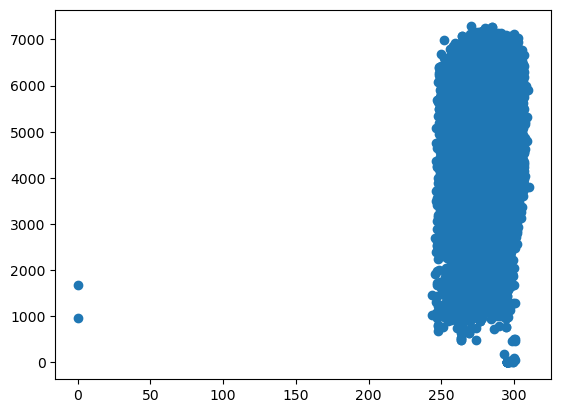

In [75]:
plt.scatter(day["temp"],day.traffic_volume)

In [77]:
day.weather_main.unique().size

11

In [78]:
day.weather_main.unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Smoke', 'Squall'], dtype=object)

In [79]:
day.groupby("weather_main")["traffic_volume"].mean()

weather_main
Clear           4778.416260
Clouds          4865.415996
Drizzle         4837.212911
Fog             4372.491713
Haze            4609.893285
Mist            4623.976475
Rain            4815.568462
Smoke           4564.583333
Snow            4396.321183
Squall          4211.000000
Thunderstorm    4648.212860
Name: traffic_volume, dtype: float64

<Axes: ylabel='weather_main'>

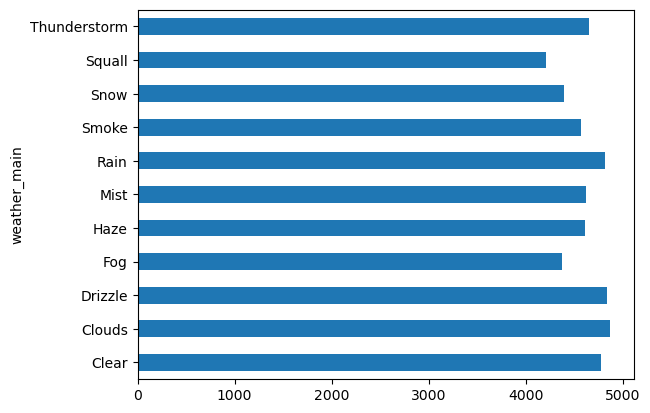

In [81]:
day.groupby("weather_main")["traffic_volume"].mean().plot.barh()

<Axes: ylabel='weather_main,weather_description'>

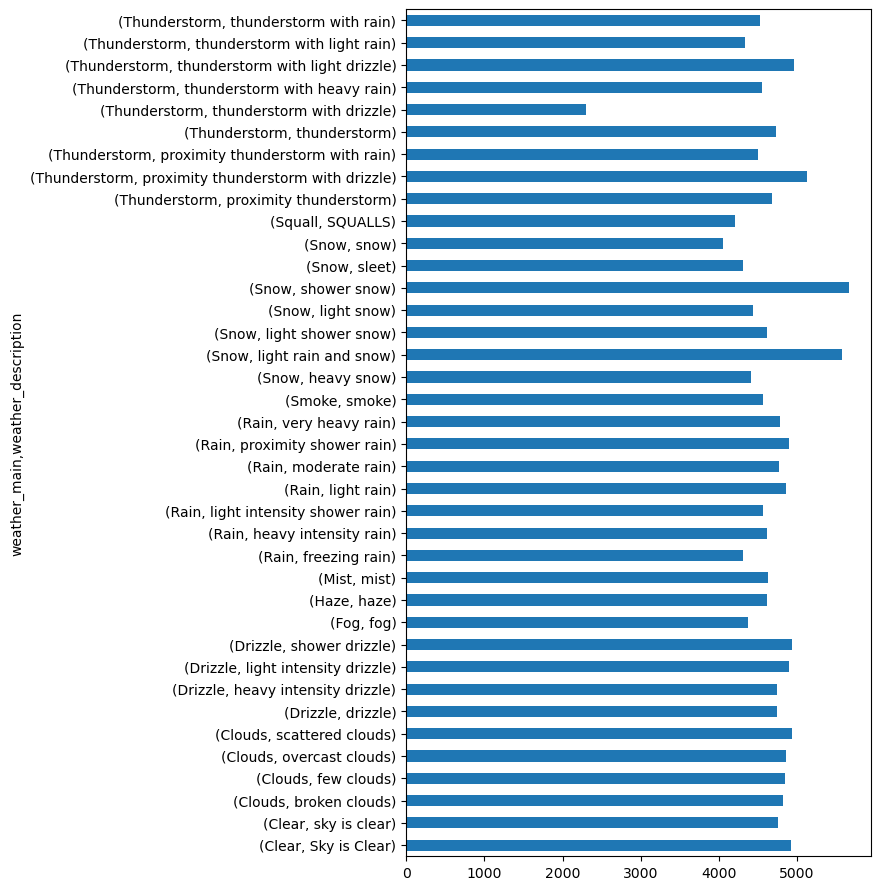

In [85]:
plt.figure(figsize=(6,11))
day.groupby(["weather_main","weather_description"])["traffic_volume"].mean().plot.barh()

<Axes: ylabel='weather_description'>

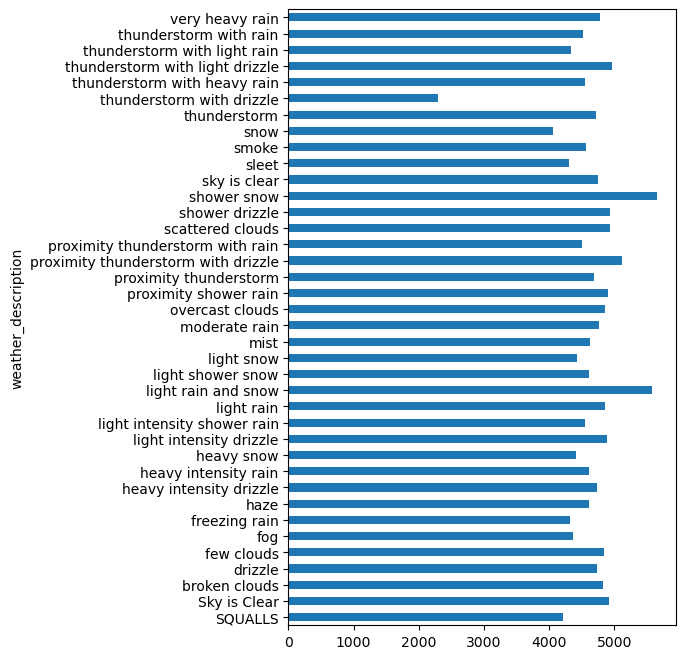

In [87]:
plt.figure(figsize=(5,8))
day.groupby("weather_description")["traffic_volume"].mean().plot.barh()

In [88]:
day["weather_description"].value_counts().sort_values(ascending= False)

sky is clear                           4892
broken clouds                          2793
mist                                   2593
overcast clouds                        2585
scattered clouds                       2181
light rain                             1707
few clouds                             1143
light snow                              978
Sky is Clear                            852
haze                                    834
moderate rain                           785
light intensity drizzle                 573
fog                                     362
heavy snow                              320
proximity thunderstorm                  303
drizzle                                 278
heavy intensity rain                    219
snow                                    137
proximity shower rain                   111
thunderstorm                             48
heavy intensity drizzle                  29
thunderstorm with heavy rain             25
thunderstorm with light rain    

In [91]:
day["weather_description"] = day["weather_description"].str.replace("Sky is Clear","sky is clear")

C:\Users\hp\AppData\Local\Temp\ipykernel_27588\1950711839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day["weather_description"] = day["weather_description"].str.replace("Sky is Clear","sky is clear")


In [92]:
day["weather_description"].value_counts().sort_values(ascending= False)

sky is clear                           5744
broken clouds                          2793
mist                                   2593
overcast clouds                        2585
scattered clouds                       2181
light rain                             1707
few clouds                             1143
light snow                              978
haze                                    834
moderate rain                           785
light intensity drizzle                 573
fog                                     362
heavy snow                              320
proximity thunderstorm                  303
drizzle                                 278
heavy intensity rain                    219
snow                                    137
proximity shower rain                   111
thunderstorm                             48
heavy intensity drizzle                  29
thunderstorm with heavy rain             25
thunderstorm with light rain             23
thunderstorm with rain          